#### Introduction to Numpy
Vector is an array with one dimension. Matrix is a 2D array, and tensor is a 3D array or more \
Axis 0 refers to rows, Axis 1 referes to columns

#### Understanding NumPy Arrays
<b>var = np.array(var2)</b> Create numpy array. Numpy array can only contain a single data type 
<br></br>
<b>np.zeros(), np.random.random()</b>Take tuple of desired array size as parameter 
<br></br>
<b>np.arange()</b> (2,3) Start and stop value, (5) start is 0 and stop is 5, (6, 13, 3) Start is 6 stop is 13 and step is 3 so array would equal [6, 9, 12]  \
<b>var.flatten()</b> Take all array elements and puts them into a 1D array \
<b>var.reshape()</b> Redefine the shape of an array. var.reshape((2, 3)) turns given array into 2 rows and 3 columns \
<b>var = np.array([1, 2, 3], dtype=np.float32)</b> data type is float and 32 bit size. For T/F arrays dtype parameter can be dtype=np.bool_ to convert to 1s and 0s \
<b>var = var1.astype(np.int8)</b> Changes var1 array into int8 data type


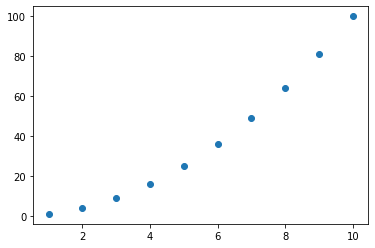

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of integers from one to ten
one_to_ten = np.arange(1,11)

# Create your scatterplot
plt.scatter(x=one_to_ten, y=one_to_ten ** 2)
plt.show()

In [6]:
sudoku_game = np.array([[5, 3, 1, 4], [5, 1, 7, 4]])
sudoku_solution = np.array([[9, 3, 5, 2], [2, 3, 8, 2]])
# Create the game_and_solution 3D array
game_and_solution = np.array([sudoku_game,sudoku_solution])

# Print game_and_solution
print(game_and_solution) 

[[[5 3 1 4]
  [5 1 7 4]]

 [[9 3 5 2]
  [2 3 8 2]]]


In [ ]:
# Flatten sudoku_game
flattened_game = sudoku_game.flatten()

# Print the shape of flattened_game
print(flattened_game.shape)

# Reshape flattened_game back to a nine by nine array
reshaped_game = flattened_game.reshape((9, 9))

# Print sudoku_game and reshaped_game
print(sudoku_game)
print(reshaped_game)

In [ ]:
# Print the data type of sudoku_game
print(sudoku_game.dtype)

# Change the data type of sudoku_game to int8
small_sudoku_game = sudoku_game.astype(np.int8)

# Print the data type of small_sudoku_game
print(small_sudoku_game.dtype)

#### Selecting and Updating Data
<b>array[3:6, 2:4]</b> Slice from rows 3 to 6(exclusive) and columns 2 to 4(exclusive). adding thrid value would be step size. EX [3:6:2, 2:4:2] \
<b>np.sort(array)</b> Sort along the columns with the highest number from each row in the far right. Parameter axis=0 sorts so that the highest numbers in each column are at the bottom \
<b>mask = array % 2 == 0</b> Fancy indexing: Give array of True or false depending if the array values are divisible by 2 \
<b>array[mask]</b> Gives the values of the array that are divisible by 2. \
<b>array[:, 0][array[:, 1] % 2 ==0]</b> 2D fancy indexing: Index first column using mask to return first column's rows where they meet the condition given to the second column(if divisible by 2) \
<b>np.where(array == 0, "", array)</b> Find elements that equal 0 and replace with empty string. If element does not equal zero then replace with original array(in other words do nothing) \
<b>np.concatenate((array0, array1), axis=0)</b> Default is axis 1 (adding new rows) \
<b>np.delete(array_name, 1, axis=0)</b> Deletes second row(1) in the array_name array along the first axis(axis=0) axis=1 would delete the second column. If no axis is given it would delete the second index in a flattened version of the array /

In [2]:
tree_census = np.load("tree_census.npy")
# Select all rows of block ID data from the second column
block_ids = tree_census[:, 1]

# Select five block IDs from block_ids starting with the tenth ID
block_id_slice = block_ids[9:14]
print(block_id_slice)

[501911 501911 501911 501909 501909]


In [3]:
# Create an array of trunk diameters with even row indices from 50 to 100 inclusive
every_other_diameter = tree_census[50:101:2, 2]
print(every_other_diameter)

[ 5  5 51  4  3  6  3  3  3  6  5  5  4  7  6  4  5  5  3  3  6  8  4  4
  4  6]


In [9]:
# Create an array which contains row data on the largest tree in tree_census
largest_tree_data = tree_census[tree_census[:, 2] == 51]
print("largest tree:" + str(largest_tree_data))

# Slice largest_tree_data to get only the block ID
largest_tree_block_id = largest_tree_data[:, 1]
print("Block id:" + str(largest_tree_block_id))

# Create an array which contains row data on all trees with largest_tree_block_id
trees_on_largest_tree_block = tree_census[tree_census[:, 1] == largest_tree_block_id]
print("Trees on largest tree block:\n" + str(trees_on_largest_tree_block))

largest tree:[[    61 501882     51      0]]
Block id:[501882]
Trees on largest tree block:
[[    60 501882      8      0]
 [    61 501882     51      0]
 [    62 501882      7      0]
 [    63 501882      4      0]
 [    64 501882     15      0]
 [    65 501882      3      0]
 [    66 501882      8      0]
 [    67 501882      6      0]
 [    68 501882      6      0]
 [    69 501882      3      0]]


In [10]:
# Create an array of row_indices for trees on block 313879
row_indices = np.where(tree_census[:, 1] == 313879)

# Create an array which only contains data for trees on block 313879
block_313879 = tree_census[row_indices]
print(block_313879)

[[  1115 313879      3      0]
 [  1116 313879     17      0]]


In [14]:
# Create and print a 1D array which replaces a tree's trunk diameter with its stump diameter 
# if the trunk diameter is zero.
trunk_stump_diameters = np.where(tree_census[:, 2] == 0, tree_census[:, 3], tree_census[:, 2])

In [17]:
new_trees = np.array([[  1211, 227386,     20,      0],
                        [  1212, 227386,      8,      0]])
# Print the shapes of tree_census and new_trees
print(tree_census.shape, new_trees.shape)

# Add rows to tree_census which contain data for the new trees
updated_tree_census = np.concatenate((tree_census, new_trees), axis=0)
print(updated_tree_census)

(1000, 4) (2, 4)
[[     3 501451     24      0]
 [     4 501451     20      0]
 [     7 501911      3      0]
 ...
 [  1210 227386      6      0]
 [  1211 227386     20      0]
 [  1212 227386      8      0]]


In [19]:
# Print the shapes of tree_census and trunk_stump_diameters
print(trunk_stump_diameters.shape, tree_census.shape)

# Reshape trunk_stump_diameters
reshaped_diameters = trunk_stump_diameters.reshape((1000, 1))
print(reshaped_diameters.shape)

# Concatenate reshaped_diameters to tree_census as the last column
concatenated_tree_census = np.concatenate((tree_census, reshaped_diameters), axis=1)
print(concatenated_tree_census)

(1000,) (1000, 4)
(1000, 1)
[[     3 501451     24      0     24]
 [     4 501451     20      0     20]
 [     7 501911      3      0      3]
 ...
 [  1198 227387     11      0     11]
 [  1199 227387     11      0     11]
 [  1210 227386      6      0      6]]


In [20]:
# Delete the stump diameter column from tree_census
tree_census_no_stumps = np.delete(tree_census, 3, axis=1)

# Save the indices of the trees on block 313879
private_block_indices = np.where(tree_census[:,1] == 313879)

# Delete the rows for trees on block 313879 from tree_census_no_stumps
tree_census_clean = np.delete(tree_census_no_stumps, private_block_indices, axis=0)

# Print the shape of tree_census_clean
print(tree_census_clean.shape)

(998, 3)


#### Array Mathematics
<b>array.sum(axis=0, keepdims=True )</b> Returns sum of the values in all rows for each column, creating columns total. axis=1 does the opposite creating row total. keepdims keeps the original dimension are left in the output array and set to one. Meaning it is a 2D array. \
<b>len(array) > 2</b> Will return T/F depending if the array has more than 2 elements in the array \
<b>var = vectorize(len) ... var(array) > 2</b> Will return T/F for each element in the array 


In [1]:
import matplotlib.pyplot as plt
import numpy as np

monthly_sales = np.load("monthly_sales.npy")

# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims=True)
print(monthly_industry_sales)

# Add this column as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis=1)
print(monthly_sales_with_total)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]
[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


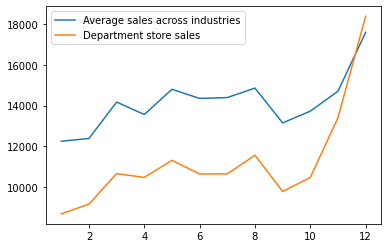

In [2]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis=1)
print(avg_monthly_sales)

# Plot avg_monthly_sales by month
plt.plot(np.arange(1, 13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot(np.arange(1, 13), monthly_sales[:, 2], label="Department store sales")
plt.legend()
plt.show()

[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


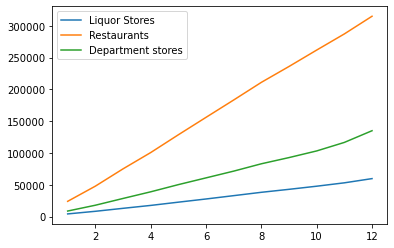

In [3]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
print(cumulative_monthly_industry_sales)

# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()

[[ 4051.32 24403.5   8657.  ]
 [ 4116.   24113.75  8867.74]
 [ 4953.38 28012.91 10432.1 ]
 [ 4946.4  25893.37 10246.88]
 [ 5517.72 27435.1  11073.02]
 [ 5512.1  27144.81 10518.75]
 [ 5874.4  27578.05 10630.  ]
 [ 5797.   28315.2  11550.  ]
 [ 5194.8  25237.88  9859.62]
 [ 5306.04 25543.98 10142.32]
 [ 5790.08 25405.   13669.02]
 [ 7491.9  28630.91 18771.06]]


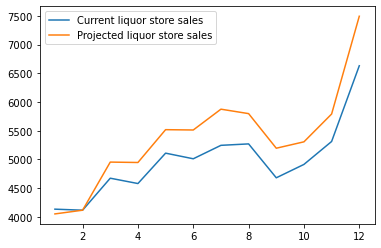

In [5]:
monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],[1.00, 1.01, 0.97],[1.06, 1.03, 0.98],[1.08, 1.01, 0.98],[1.08, 0.98, 0.98],[1.1 , 0.99, 0.99],[1.12, 1.01, 1.  ],[1.1 , 1.02, 1.  ],[1.11, 1.01, 1.01],[1.08, 0.99, 0.97],[1.09, 1.  , 1.02],[1.13, 1.03, 1.02]])
# Create an array of monthly projected sales for all industries
projected_monthly_sales = monthly_sales * monthly_industry_multipliers
print(projected_monthly_sales)

# Graph current liquor store sales and projected liquor store sales by month
plt.plot(np.arange(1,13), monthly_sales[:,0], label="Current liquor store sales")
plt.plot(np.arange(1,13), projected_monthly_sales[:,0], label="Projected liquor store sales")
plt.legend()
plt.show()

In [6]:
names = np.array(['Izzy', 'Monica', 'Marvin', 'Weber', 'Patel', 'Hernandez'],
      dtype='<U9')
# Vectorize the .upper() string method
vectorized_upper = np.vectorize(str.upper)

# Apply vectorized_upper to the names array
uppercase_names = vectorized_upper(names)
print(uppercase_names)

['IZZY' 'MONICA' 'MARVIN' 'WEBER' 'PATEL' 'HERNANDEZ']


In [7]:
monthly_growth_rate = [1.01, 1.03, 1.03, 1.02, 1.05, 1.03, 1.06, 1.04, 1.03, 1.04, 1.02, 1.01]
# Convert monthly_growth_rate into a NumPy array
monthly_growth_1D = np.array(monthly_growth_rate)

# Reshape monthly_growth_1D
monthly_growth_2D = monthly_growth_1D.reshape(12,1)

# Multiply each column in monthly_sales by monthly_growth_2D
print(monthly_sales*monthly_growth_2D)

[[ 4175.34 24164.25  8743.57]
 [ 4239.48 24591.25  9416.26]
 [ 4813.19 28012.91 10964.35]
 [ 4671.6  26149.74 10665.12]
 [ 5364.45 29394.75 11863.95]
 [ 5161.33 28241.57 10943.75]
 [ 5559.7  28943.3  11267.8 ]
 [ 5480.8  28870.4  12012.  ]
 [ 4820.4  25737.64 10054.86]
 [ 5109.52 26834.08 10874.24]
 [ 5418.24 25913.1  13669.02]
 [ 6696.3  28074.97 18587.03]]


In [8]:
# Find the mean sales projection multiplier for each industry
mean_multipliers = monthly_industry_multipliers.mean(axis=0)
print(mean_multipliers)

# Print the shapes of mean_multipliers and monthly_sales
print(mean_multipliers.shape, monthly_sales.shape)

# Multiply each value by the multiplier for that industry
projected_sales = monthly_sales * mean_multipliers
print(projected_sales)

[1.0775     1.00833333 0.99333333]
(3,) (12, 3)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]


#### Array Transformation
<b>with open("name_of_file", "rb") as f: \
        var = np.load(f)</b> \
Load file called name_of_file as read binary("rb") as alias name of. Load it under the variable name var. \
<b>with open("new_name.npy", "wb") as f: \
        np.save(f, "var")</b> \
create file called new_name as write binary("wb") as alias name of. Save array named "var" to "new_file.npy". \
<b>np.flip(array, axis=0)</b> Flip on both axis so that leftmost pixels are rightmost and top pixels are bottom. Also rgb color is flip so 255 is 0 and 0 is 255. axis=0 only flips along row axis (top to bottom). axis=2 is rgb values. Can pass tuple to flip 2 of 3 axis. Ex: axis=(0,1) flip columns and rows but not rgb \
<b>np.transpose(array, axes(1, 0, 2))</b> flips axis order to axis 1 is no 0 and vice versa(Columns become rows and vice versa) . axes parameter changes order from 0, 1, 2 to 1, 0, 2, meaning that rows and columns are switched but color remains the same /
<b>np.split(array, 3, axis=2)</b> Split array into 3 even arrays for the rgb values(axis=2) /
<b>np.stack([array1, array2, array3], axis=2)</b> Undoes what np.split did above



In [12]:
with open("rgb_array.npy", "rb") as f:
    rgb_array = np.load(f)
# Display the documentation for .astype()
help(np.ndarray.astype)

Help on method_descriptor:

astype(...)
    a.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    
    Copy of the array, cast to a specified type.
    
    Parameters
    ----------
    dtype : str or dtype
        Typecode or data-type to which the array is cast.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout order of the result.
        'C' means C order, 'F' means Fortran order, 'A'
        means 'F' order if all the arrays are Fortran contiguous,
        'C' order otherwise, and 'K' means as close to the
        order the array elements appear in memory as possible.
        Default is 'K'.
    casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
        Controls what kind of data casting may occur. Defaults to 'unsafe'
        for backwards compatibility.
    
          * 'no' means the data types should not be cast at all.
          * 'equiv' means only byte-order changes are allowed.
          * 'safe' means only cas

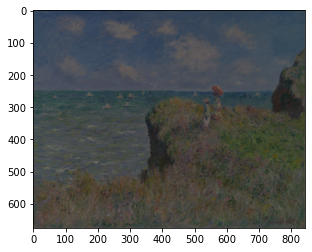

In [13]:
# Reduce every value in rgb_array by 50 percent
darker_rgb_array = rgb_array * 0.5

# Convert darker_rgb_array into an array of integers
darker_rgb_int_array = darker_rgb_array.astype(np.int8)
plt.imshow(darker_rgb_int_array)
plt.show()

# Save darker_rgb_int_array to an .npy file called darker_monet.npy
with open("darker_monet.npy", "wb") as f:
    np.save(f, darker_rgb_int_array)

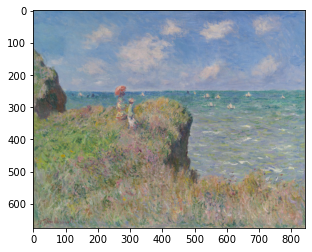

In [14]:
# Flip rgb_array so that it is the mirror image of the original
mirrored_monet = np.flip(rgb_array, axis=1)
plt.imshow(mirrored_monet)
plt.show()

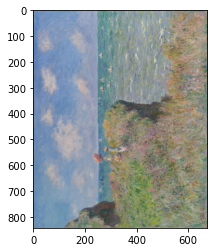

In [15]:
# Transpose rgb_array
transposed_rgb = np.transpose(rgb_array, axes=(1,0,2))
plt.imshow(transposed_rgb)
plt.show()

In [19]:
# Split monthly_sales into quarterly data
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales, 4)

# Print q1_sales
print(q1_sales)

# Stack the four quarterly sales arrays
quarterly_sales = np.stack([q1_sales, q2_sales, q3_sales, q4_sales], axis=0)
print(quarterly_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]
[[[ 4134 23925  8657]
  [ 4116 23875  9142]
  [ 4673 27197 10645]]

 [[ 4580 25637 10456]
  [ 5109 27995 11299]
  [ 5011 27419 10625]]

 [[ 5245 27305 10630]
  [ 5270 27760 11550]
  [ 4680 24988  9762]]

 [[ 4913 25802 10456]
  [ 5312 25405 13401]
  [ 6630 27797 18403]]]


In [22]:
# Split rgb_array into red, green, and blue arrays
red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

# Create emphasized_blue_array
emphasized_blue_array = np.where(blue_array > blue_array.mean(), 255, blue_array)

# Print the shape of emphasized_blue_array
print(emphasized_blue_array.shape)

# Remove the trailing dimension from emphasized_blue_array
emphasized_blue_array_2D = emphasized_blue_array.reshape(675, 843)

(675, 843, 1)


(675, 843, 1) (675, 843)


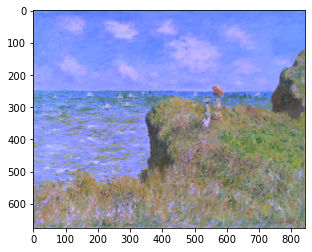

In [25]:
# Print the shapes of blue_array and emphasized_blue_array_2D
print(blue_array.shape, emphasized_blue_array_2D.shape)

# Reshape red_array and green_array
red_array_2D = red_array.reshape((675, 843))
green_array_2D = green_array.reshape((675, 843))

# Stack red_array_2D, green_array_2D, and emphasized_blue_array_2D
emphasized_blue_monet = np.stack([red_array_2D, green_array_2D, emphasized_blue_array_2D], axis=2)
plt.imshow(emphasized_blue_monet)
plt.show()